In [1]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential#allowing us to define our neural model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
 
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)#make blobs is useful in making scatterd classes 
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
print(y)
y_cat = to_categorical(y, 5)#to_categorical is a way to account for multiclass classification (a way to lable them ex: [0,0,1] for one of three classes)
print(y_cat)

Using TensorFlow backend.


[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [2]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))#anothre important subject is using softmax instead of segmoifd which was only for binary classification
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

In [3]:
#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 231us/step - loss: 1.4925 - accuracy: 0.3440
Epoch 2/100
500/500 [==============================] - 0s 30us/step - loss: 0.7017 - accuracy: 0.7880
Epoch 3/100
500/500 [==============================] - 0s 34us/step - loss: 0.4522 - accuracy: 0.8920
Epoch 4/100
500/500 [==============================] - 0s 34us/step - loss: 0.3549 - accuracy: 0.9400
Epoch 5/100
500/500 [==============================] - 0s 32us/step - loss: 0.3073 - accuracy: 0.9460
Epoch 6/100
500/500 [==============================] - 0s 42us/step - loss: 0.2771 - accuracy: 0.9420
Epoch 7/100
500/500 [==============================] - 0s 30us/step - loss: 0.2580 - accuracy: 0.9380
Epoch 8/100
500/500 [==============================] - 0s 36us/step - loss: 0.2453 - accuracy: 0.9420
Epoch 9/100
500/500 [==============================] - 0s 44us/step - loss: 0.2316 - accuracy: 0.9520
Epoch 10/100
500/500 [==============================] - 0s 44us/step - loss: 0.22

In [4]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid) #another difference is here that we use predict_classes which is designed for multiclass prediction
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

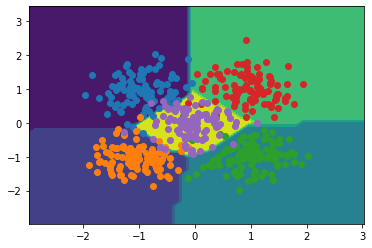

In [5]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is:  [4]


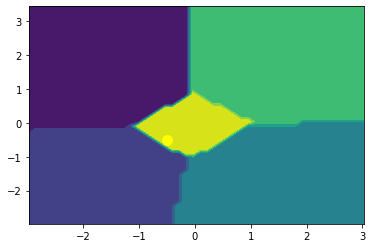

In [7]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)